In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import tqdm
import numba
import pickle
import matplotlib
import numpy as np
import pandas as pd
import ase.io as aio
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from toolz.curried import pipe, curry, compose

In [3]:
import matplotlib as mpl
scale = 8
mpl.rcParams['figure.figsize'] = [scale * 1.61803398, scale]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [4]:
import utilities as utils

In [5]:
runs = np.loadtxt("runs.txt").astype(int)
runs.shape

(77,)

In [6]:
get_range = lambda x: np.max(x) - np.min(x)

gen_coords = curry(lambda x, dx: np.round(((x - np.min(x)) / (np.max(x) - np.min(x))) * dx).astype(int))

get_vals = compose(lambda df: df.values, lambda f: pd.read_csv(f))

gen_img = curry(lambda val, dx: utils.get_image(np.zeros([dx+1]*2), 
                                          gen_coords(val[:,1], dx), 
                                          gen_coords(val[:,2], dx), 
                                          val[:,3]))

Cu_ACC_0.csv


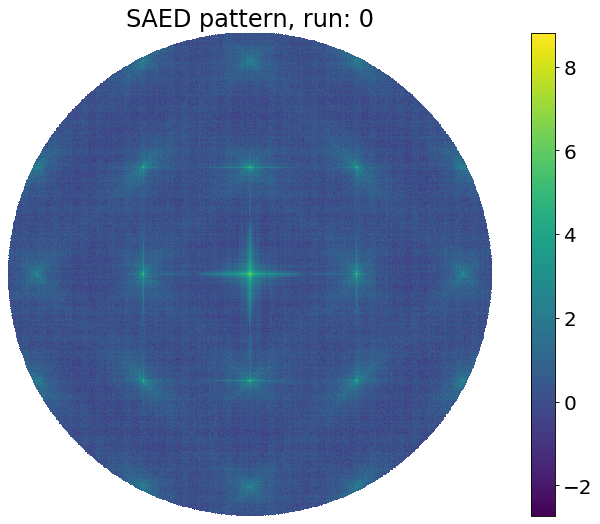

CPU times: user 13.9 s, sys: 797 ms, total: 14.7 s
Wall time: 2.54 s


In [7]:
%%time
ix = 0
fname = "../new-data/CK_Cu_ACC_SAED_CSV/Cu_ACC_{}.csv".format(runs[ix])
print(fname.split("/")[-1])
arr = gen_img(get_vals(fname), dx=1024)
utils.draw_im(np.log10(arr), 
              "SAED pattern, run: {}".format(runs[ix]))

In [8]:
csv = pd.read_csv(fname)
pt0 = csv["Points:0"]
pt1 = csv["Points:1"]
pt2 = csv["Points:2"]
print(get_range(pt0))
print(get_range(pt1))
print(get_range(pt2))

0.019609
2.498
2.498


Cu_ACC_38000.csv


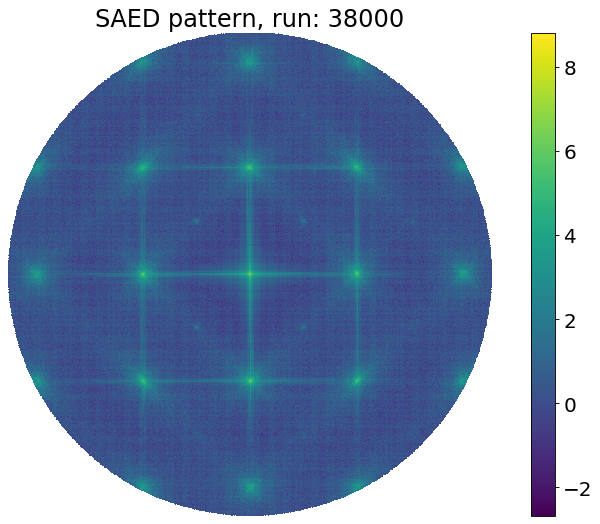

CPU times: user 6.94 s, sys: 455 ms, total: 7.4 s
Wall time: 1.45 s


In [9]:
%%time
ix = -1
fname = "../new-data/CK_Cu_ACC_SAED_CSV/Cu_ACC_{}.csv".format(runs[ix])
print(fname.split("/")[-1])
arr = gen_img(get_vals(fname), dx=1024)
utils.draw_im(np.log10(arr), 
              "SAED pattern, run: {}".format(runs[ix]))

# save SAED patterns as 2D arrays for all structures

In [11]:
folder_saed = "data/saeds_1024"
if not os.path.exists(folder_saed):
    os.mkdir(folder_saed)

In [17]:
get_fout = lambda f_in, dx: os.path.join(folder_saed, f_in.split("/")[-1][:-4]+"_{}_saed.pkl".format(dx))

def csv_to_img(run, dx=1024):
    fname = "../new-data/CK_Cu_ACC_SAED_CSV/Cu_ACC_{}.csv".format(run)
    utils.save_file(get_fout(fname, dx), 
                gen_img(get_vals(fname), 
                        dx=dx))

In [19]:
%%time
import multiprocessing as mp

n_proc = 10

with mp.Pool(n_proc) as P:
    P.map(csv_to_img, runs)

CPU times: user 17.4 ms, sys: 112 ms, total: 130 ms
Wall time: 19.7 s


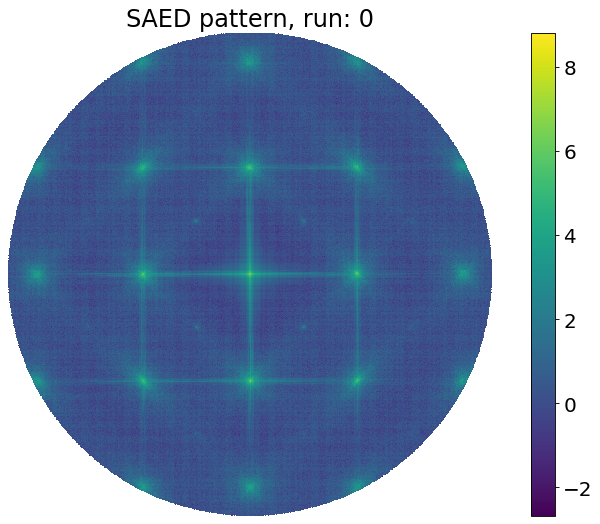

In [22]:
ix = 0
img = utils.load_file("data/saeds_1024/Cu_ACC_{}_1024_saed.pkl".format(runs[ix]))
utils.draw_im(np.log10(arr), 
              "SAED pattern, run: {}".format(runs[ix]))